In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dataset=pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Making Prediction


In [3]:
X= dataset.drop('DEATH_EVENT',axis=1)
X=X.drop('time',axis=1)
y=dataset['DEATH_EVENT']

In [4]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [6]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()
'''
sc1 = StandardScaler()
sc2 = StandardScaler()
sc3 = StandardScaler()
sc4 = StandardScaler()
sc5 = StandardScaler()
sc6 = StandardScaler()
age=[int(i) for i in X_train['age']]
age=np.asarray(age)
print(age.reshape(1,-1))
X_train_scaled['age'] = sc1.fit_transform(X_train[['age']])
X_train['age'] = pd.DataFrame(X_train_scaled['age'])
'''
X_train_scaled = sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)
X_test_scaled = sc.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

D:\Anacona3\envs\tf_gpuu\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [11]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.237151,-0.852803,0.007231,1.232101,-1.161762,-0.740370,2.660248,-0.373951,0.297672,0.763763,-0.656892
1,0.792466,-0.852803,-0.448525,-0.811622,-1.161762,-0.740370,-0.199304,-0.173475,1.226232,-1.309307,-0.656892
2,-1.609974,1.172604,-0.529717,-0.811622,-0.295518,-0.740370,1.131488,-0.273713,0.529812,0.763763,1.522321
3,1.822083,1.172604,0.302769,1.232101,1.003848,1.350676,0.647563,-0.373951,1.922652,-1.309307,-0.656892
4,2.251090,1.172604,-0.461516,-0.811622,-0.035644,-0.740370,-0.001335,-0.474190,0.761952,0.763763,-0.656892


# 1. KNN k-Nearest Neighor Algorithm
### Implementing GridSearchCv to select best parameters and applying k-NN Algorithm

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,50)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10,11,12,16,14,15,16],
    'leaf_size':list(range(1,50)),
    'weights':['uniform', 'distance']
         }

In [13]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)

In [14]:
model.fit(X_train,y_train)
model.best_params_ 

D:\Anacona3\envs\tf_gpuu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'leaf_size': 1, 'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}

In [15]:
predict = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.5888888888888889
Using k-NN we get an accuracy score of:  58.889 %


NameError: name 'cnf_matrix' is not defined

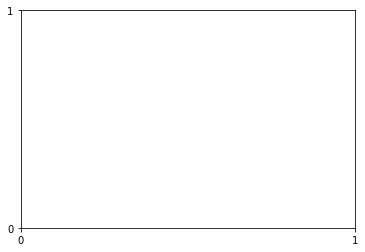

In [17]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()